pycaret is an automated machine learning (AutoML) library that simplifies data preprocessing, model selection, training, tuning, and deployment.

It supports various ML tasks, including classification, regression, clustering, anomaly detection, NLP, and time series forecasting.

The transformers library provides pre-trained models for natural language processing (NLP) tasks such as text classification, translation, summarization, and question answering.

It supports models like BERT, GPT, T5, RoBERTa, and more.

It allows easy fine-tuning on custom datasets.

In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

--upgrade: Ensures that if any of the packages are already installed, they are updated to the specified or latest version.

pandas==2.2.2: Installs pandas (a data manipulation library) version 2.2.2.

matplotlib==3.8.0: Installs matplotlib (a plotting library) version 3.8.0.

google-colab: Installs the Google Colab tools (helps with notebook functionality).

mizani: Installs mizani, a scales library used by plotnine (like ggplot2 for Python).

plotnine: Installs plotnine, a grammar-of-graphics plotting library similar to R’s ggplot2.

In [ ]:
!pip install --upgrade pandas==2.2.2 matplotlib==3.8.0 google-colab mizani plotnine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.8.0 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.2 which is incompatible.
sktime 0.26.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.2.2 which is incompatible.


torch (PyTorch)

An open-source machine learning framework developed by Meta (Facebook).

Used for deep learning, tensor computations, and GPU acceleration.

Provides automatic differentiation for building and training neural networks.

torch.nn (Neural Network Module)

The torch.nn module contains classes and functions for creating deep learning models.

Provides layers like Linear, Conv2D, LSTM, GRU, activation functions, loss functions, and more.

– Imports PyTorch, a library for deep learning.

– Imports the neural network module from PyTorch to define and use layers like Linear, ReLU, etc.

Let me know if you'd like an example of how these are used!


In [ ]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [ ]:
import pandas as pd

# Load Dataset
true_data = pd.read_csv('/content/a1_True (1).csv')
fake_data = pd.read_csv('/content/a2_Fake (1).csv')

# Generate labels True/Fake under new Target Column in 'true_data' and 'fake_data'
true_data['Target'] = 'True'
fake_data['Target'] = 'Fake'

# Merge 'true_data' and 'fake_data', shuffle, and reset index
data = pd.concat([true_data, fake_data]).sample(frac=1).reset_index(drop=True)

# See how the data looks like
print(data.shape)
data.head()


(44898, 5)


,title,text,subject,date,Target
0,WOW! Watch Former Democrat Hammer Obama On His...,"Unlike our racist, anti-American President, th...",Government News,"Jan 6, 2016",Fake
1,‘Go F*ck Yourselves’: Larry Wilmore SLAMS Ted...,"The terror attacks in Brussels, Belgium have b...",News,"March 24, 2016",Fake
2,Hungary eases pressure on international univer...,BUDAPEST (Reuters) - Hungary has extended a de...,worldnews,"October 17, 2017",True
3,"Out of Russian custody, Tatar leaders vow to r...",KIEV (Reuters) - Two Crimean Tatar activists r...,worldnews,"October 27, 2017",True
4,RELIGION OF PROGRESSIVISM: Meet Obama’s NEW Tr...,The religion of Progressivism is working overt...,left-news,"May 21, 2016",Fake


In [ ]:
# Target column is made of string values True/Fake, let's change it to numbers 0/1 (Fake=1)
data['label'] = pd.get_dummies(data.Target)['Fake']

In [ ]:
data.head()

,title,text,subject,date,Target,label
0,WOW! Watch Former Democrat Hammer Obama On His...,"Unlike our racist, anti-American President, th...",Government News,"Jan 6, 2016",Fake,True
1,‘Go F*ck Yourselves’: Larry Wilmore SLAMS Ted...,"The terror attacks in Brussels, Belgium have b...",News,"March 24, 2016",Fake,True
2,Hungary eases pressure on international univer...,BUDAPEST (Reuters) - Hungary has extended a de...,worldnews,"October 17, 2017",True,False
3,"Out of Russian custody, Tatar leaders vow to r...",KIEV (Reuters) - Two Crimean Tatar activists r...,worldnews,"October 27, 2017",True,False
4,RELIGION OF PROGRESSIVISM: Meet Obama’s NEW Tr...,The religion of Progressivism is working overt...,left-news,"May 21, 2016",Fake,True


([<matplotlib.patches.Wedge at 0x7f750e96b950>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

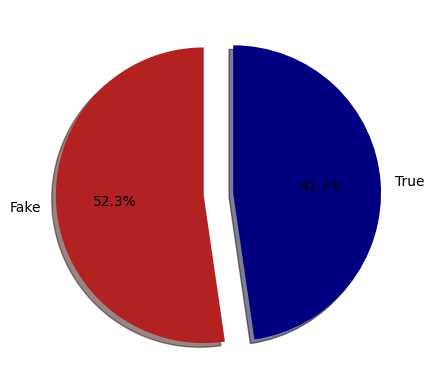

In [ ]:
# Checking if our data is well balanced
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [ ]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

Loads the pre-trained BERT model (bert-base-uncased), which:

Has 12 layers, 768 hidden dimensions, and 110M parameters.

Is uncased, meaning it treats "Apple" and "apple" as the same.

This code initializes the BERT (Bidirectional Encoder Representations from Transformers) model and its corresponding tokenizer using the Hugging Face transformers library.

AutoModel: A generic class that loads a pre-trained model without specifying its type manually.

BertTokenizerFast: A fast tokenizer for BERT, optimized for speed

What does the tokenizer do?
Splits the text into subwords or tokens (using WordPiece in BERT).

Converts tokens to IDs using BERT’s vocabulary.

Adds special tokens like [CLS] and [SEP] if needed.

Creates attention masks (to tell the model which tokens are padding).

Pads or truncates the text to a fixed length (if specified).

In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

This code visualizes the distribution of the number of words in the title field of the training dataset. The histogram helps understand text length variations, which is crucial for text preprocessing in NLP tasks like fake news detection.

Text(0, 0.5, 'Number of texts')

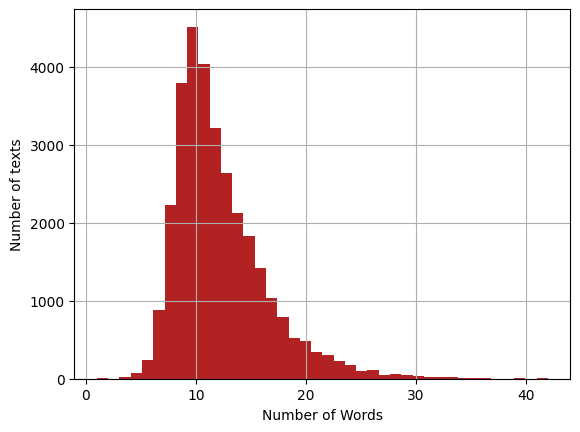

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

The BERT tokenizer from Hugging Face's transformers library is used to convert raw text into numerical tokens that can be processed by a BERT-based deep learning model. This step is crucial for Natural Language Processing (NLP) tasks, such as fake news detection.

 Uses BERT's tokenizer to encode both sentences:

Tokenizes each sentence.

Converts tokens to IDs.

Adds special tokens ([CLS], [SEP]).

Pads the shorter sentence to match the longest one (so both have the same length).

 Displays the output, which will be a dictionary containing:

input_ids: the numerical IDs for each token.

attention_mask: 1 for real tokens, 0 for padding tokens.

Possibly token_type_ids if it's a pair of sentences.

In [ ]:
# BERT Tokeizer Functionality
sample_data = ["Build fake news model.",
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


Does the same tokenizing for Train,validation,Test data

In [ ]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

A tensor is just a multi-dimensional array — like a more powerful version of lists or NumPy arrays — used by PyTorch (and also TensorFlow) to store and process data for deep learning.

A tensor is like a container of numbers that can go to the GPU for super fast calculations.



Converts input token IDs of training data into a tensor.

– Converts attention masks of training data into a tensor.

– Converts the training labels into a tensor.



In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

– Imports tools to:

Wrap datasets (TensorDataset)

Load data in batches (DataLoader)

Sample randomly or sequentially



– Combines input IDs, attention masks, and labels into one dataset object.

– Ensures data is shuffled randomly during training (helps avoid learning in order).

 Creates the train data loader that:

Feeds data in batches

Uses the random sampler

In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

Why do this?
You don’t want to retrain BERT from scratch — it's already trained on huge datasets.

Instead, you only want to train the extra layers (like classification layers) that you add on top.

This is called feature extraction.

→ Freezes each parameter so that its value won’t change during training (no gradient updates).



In [ ]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

– The constructor takes a pretrained BERT model as input.

self.bert = bert
self.dropout = nn.Dropout(0.1)        # Prevents overfitting
self.relu = nn.ReLU()                 # Adds non-linearity
self.fc1 = nn.Linear(768, 512)        # First dense layer
self.fc2 = nn.Linear(512, 2)          # Output layer for 2 classes
self.softmax = nn.LogSoftmax(dim=1)   # Converts logits to log probabilities

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

– Checks if a GPU is available:

If yes → uses GPU (cuda)

If not → uses CPU

This ensures your model runs faster if a GPU is present.

print(f"Using device: {device}")
– Displays whether you're using CPU or GPU.

In [ ]:
import torch

# Define device (use GPU if available, otherwise fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")  # This will print 'cuda' if GPU is available, otherwise 'cpu'


Using device: cpu


In [ ]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

model.train()
– Sets model to training mode (activates dropout, etc.)

for step, batch in enumerate(train_dataloader):
– Loops through training batches.

batch = [r.to(device) for r in batch]
sent_id, mask, labels = batch
labels = labels.long()
– Moves data to GPU/CPU and converts labels to long (required by loss function)

.
– Clears previous gradients.

preds = model(sent_id, mask)
– Gets predictions from model.

loss.backward()
torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
optimizer.step()
– Backpropagation, gradient clipping, and weight update

avg_loss = total_loss / len(train_dataloader)
return avg_loss
– Returns average training loss.

In [ ]:
def train():
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and step != 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        batch = [r.to(device) for r in batch]  # Move batch to device
        sent_id, mask, labels = batch
        labels = labels.long()  # ✅ Convert labels to Long

        model.zero_grad()
        preds = model(sent_id, mask)
        loss = cross_entropy(preds, labels)

        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    return avg_loss

def evaluate():
    print("\nEvaluating...")
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for step, batch in enumerate(val_dataloader):
            if step % 50 == 0 and step != 0:
                print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

            batch = [t.to(device) for t in batch]  # Move batch to device
            sent_id, mask, labels = batch
            labels = labels.long()  # ✅ Convert labels to Long

            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss += loss.item()

    avg_loss = total_loss / len(val_dataloader)
    return avg_loss


if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'c2_new_model_weights.pt')
– If the current validation loss is lower than any before:

Update best score

Save model weights to 'c2_new_model_weights.pt'

train_losses.append(train_loss)
valid_losses.append(valid_loss)
– Keeps a record of training and validation loss for later plotting or analysis.



In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.560
Validation Loss: 0.492

 Epoch 2 / 2
  Batch    50  of    983.


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

       False       0.74      0.76      0.75      3212
        True       0.78      0.76      0.77      3523

    accuracy                           0.76      6735
   macro avg       0.76      0.76      0.76      6735
weighted avg       0.76      0.76      0.76      6735



In [ ]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 0, 0, 0])